In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from tqdm import tqdm

# Turning off all kinds of logging since it takes space on screen
import logging
logging.disable(logging.CRITICAL)

In [2]:
df1 = pd.read_csv("C:/Users/sudha/Downloads/twitdel.csv")
df2 = pd.read_csv("C:/Users/sudha/Downloads/twintdataa.csv")

In [3]:
df = df1.merge(df2, on="username", how = 'inner')
df

,id_x,conversation_id,created_at,date,time,timezone,user_id,username,name_x,tweet,...,replies_count,retweets_count,likes_count,hashtags,link,id_y,name_y,location,bio,verified
0,1.193320e+18,1.193200e+18,1.573340e+12,11/9/2019,23:59:49,0,1.885616e+09,devashi36451209,devashish kumar,5 acres of land should not be given in Ayodhya...,...,0,0,0,[],https://twitter.com/devashi36451209/status/119...,1.885616e+09,devashish kumar,India,Indian,False
1,1.193320e+18,1.193320e+18,1.573340e+12,11/9/2019,23:55:10,0,8.235458e+07,chittranjandube,Chit Dubey,We should respect SC’s verdict. The decades lo...,...,0,0,1,"['#ayodhya', '#india']",https://twitter.com/chittranjandube/status/119...,8.235458e+07,Chit Dubey,"My book is available on Amazon, Google books, ...","Seeker, Author, Meditation Teacher, Environmen...",False
2,1.193320e+18,1.193320e+18,1.573340e+12,11/9/2019,23:53:19,0,1.162920e+18,fozia07363038,NYCgirl,Did he think the Ayodhya verdict will normaliz...,...,0,0,0,"['#kashmir', '#kashmirfightsback', '#standwith...",https://twitter.com/fozia07363038/status/11933...,1.160000e+18,NYCgirl,NaN,NaN,False
3,1.193320e+18,1.193200e+18,1.573340e+12,11/9/2019,23:53:07,0,1.115690e+18,gyaanjunkie,gyaanjunkie,We are more secular any of you !! We preach po...,...,0,0,0,['#ayodhyaverdict'],https://twitter.com/gyaanjunkie/status/1193315...,1.120000e+18,gyaanjunkie,NaN,Bohemian seeker,False
4,1.193320e+18,1.193320e+18,1.573340e+12,11/9/2019,23:53:00,0,5.618911e+07,legsidestrangle,Mingichavu,Really not advised to have start conversation ...,...,2,0,1,[],https://twitter.com/legsidestrangle/status/119...,5.618911e+07,Mingichavu,NaN,Process. Process. Process.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320800,1.192630e+18,1.192630e+18,1.573180e+12,11/8/2019,2:11:49,0,1.157910e+18,tweet2digvijay,digvijay singh,@scigovin i dont know what is going to be the ...,...,0,0,0,[],https://twitter.com/tweet2digvijay/status/1192...,1.160000e+18,digvijay singh,NaN,the only religion is Indian,False
320801,1.192620e+18,1.192600e+18,1.573180e+12,11/8/2019,1:49:12,0,1.782965e+07,nitin_nimkar,Nitin Nimkar,"Tavleenji, I seriously question timing of your...",...,1,1,6,[],https://twitter.com/nitin_nimkar/status/119262...,1.782965e+07,Nitin Nimkar,"Mumbai, India","Techno savvy ,Education, Socially Conscious, n...",False
320802,1.192620e+18,1.192320e+18,1.573180e+12,11/8/2019,1:47:11,0,7.820082e+08,drmcshekhar,Doc MCS 🇮🇳,Oh yeah...no wonder they are busy slaughtering...,...,0,0,0,['#ayodhyaverdict'],https://twitter.com/drmcshekhar/status/1192619...,7.820082e+08,Doc MCS 🇮🇳,India,"Ex Indian Army Doctor, Onco-Surgical Pathologi...",False
320803,1.192610e+18,1.192610e+18,1.573180e+12,11/8/2019,1:20:41,0,3.995362e+07,vrvrao45,Venkatasubbarao,"Ahead of Ayodhya Ram Mandir verdict, Centre se...",...,0,0,0,[],https://twitter.com/vrvrao45/status/1192612875...,3.995362e+07,Venkatasubbarao,NEW JERCY,"I am a senior citizen, interested in meeting s...",False


               username                                              tweet  \
0       devashi36451209  5 acres of land should not be given in Ayodhya...   
1       chittranjandube  We should respect SC’s verdict. The decades lo...   
2         fozia07363038  Did he think the Ayodhya verdict will normaliz...   
3           gyaanjunkie  We are more secular any of you !! We preach po...   
4       legsidestrangle  Really not advised to have start conversation ...   
...                 ...                                                ...   
320800   tweet2digvijay  @scigovin i dont know what is going to be the ...   
320801     nitin_nimkar  Tavleenji, I seriously question timing of your...   
320802      drmcshekhar  Oh yeah...no wonder they are busy slaughtering...   
320803         vrvrao45  Ahead of Ayodhya Ram Mandir verdict, Centre se...   
320804      its_kiran29  Social media curbs in Ayodhya before verdict  ...   

                                                 location  \
0 

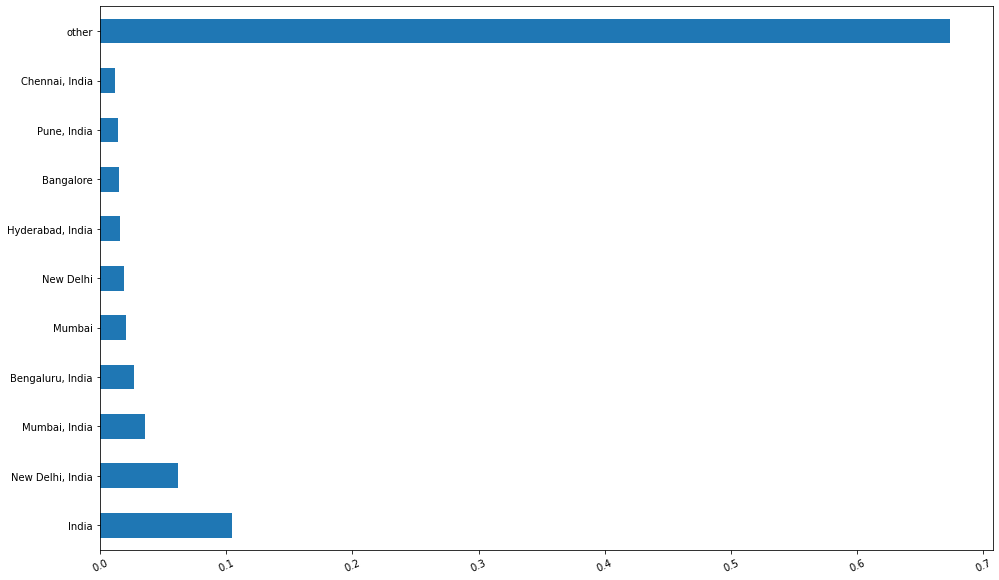

In [4]:
a = df[['username', 'tweet', 'location', 'bio']].copy()
a.drop_duplicates(keep=False, inplace = True)
print(a)
prob = a['location'].value_counts(normalize=True)
threshold = 0.01
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
plt.figure(figsize=(16,10))
prob.plot(kind='barh')
plt.xticks(rotation=25)
plt.show()
import re
import string

def clean_text(tweet):
    # Remove @usernames, URLs and hashtag symbols
    clean_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)|(#)", " ", tweet).split()) 
    # Replace topic descriptors with blank spaces
    lean_tweet = re.sub("ayodhya|Ayodhya|Verdict|AyodhyaVerdict|AYODHYAVERDICT|AYODHYA|VERDICT|Supreme|Court|Sunni|Waqf|Board|sunni|waqf|Ram|temple|court|mosque|judgment|judgement|verdict|dispute|amp|SC|today|alternate|land|Case|Hearing|Judgment|Judgement|case|acre|Mandir|BabriMasjid|Babri|Masjid|build|Muslim|Islamic|structure|Justice", " ", tweet)
    return tweet

    
tweet = lambda x: clean_text(x)

In [5]:
data_clean = pd.DataFrame(a.tweet.apply(tweet))
data_clean


,tweet
0,5 acres of land should not be given in Ayodhya...
1,We should respect SC’s verdict. The decades lo...
2,Did he think the Ayodhya verdict will normaliz...
3,We are more secular any of you !! We preach po...
4,Really not advised to have start conversation ...
...,...
320800,@scigovin i dont know what is going to be the ...
320801,"Tavleenji, I seriously question timing of your..."
320802,Oh yeah...no wonder they are busy slaughtering...
320803,"Ahead of Ayodhya Ram Mandir verdict, Centre se..."


In [6]:
from nltk.corpus import stopwords
additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'), additional)

data_clean1 = pd.DataFrame(data_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (swords)])))
data_clean1

,tweet
0,5 acres land given Ayodhya. It's like gift the...
1,We respect SC’s verdict. The decades long disp...
2,Did think Ayodhya verdict normalize #Kashmir s...
3,We secular !! We preach polytheism unlike many...
4,Really advised start conversation ayodhya verd...
...,...
320800,@scigovin dont know going verdict Ayodhya case...
320801,"Tavleenji, I seriously question timing & outra..."
320802,Oh yeah...no wonder busy slaughtering people.....
320803,"Ahead Ayodhya Ram Mandir verdict, Centre sends..."


In [7]:
import nltk
tokens = pd.DataFrame(data_clean1['tweet'].apply(nltk.word_tokenize))
tokens.head()

,tweet
0,"[5, acres, land, given, Ayodhya, ., It, 's, li..."
1,"[We, respect, SC, ’, s, verdict, ., The, decad..."
2,"[Did, think, Ayodhya, verdict, normalize, #, K..."
3,"[We, secular, !, !, We, preach, polytheism, un..."
4,"[Really, advised, start, conversation, ayodhya..."


In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
def lemmatize(s):
    s = [wnl.lemmatize(word) for word in s]
    return s
tokens= tokens.assign(lemmatize = tokens.tweet.apply(lambda x: lemmatize(x)))

In [9]:
from nltk.stem.porter import PorterStemmer 
stemmer = PorterStemmer() 
tokens['stemmer'] = tokens['lemmatize'].apply(lambda x: [stemmer.stem(i) for i in x])
tokens.head()

,tweet,lemmatize,stemmer
0,"[5, acres, land, given, Ayodhya, ., It, 's, li...","[5, acre, land, given, Ayodhya, ., It, 's, lik...","[5, acr, land, given, ayodhya, ., It, 's, like..."
1,"[We, respect, SC, ’, s, verdict, ., The, decad...","[We, respect, SC, ’, s, verdict, ., The, decad...","[We, respect, SC, ’, s, verdict, ., the, decad..."
2,"[Did, think, Ayodhya, verdict, normalize, #, K...","[Did, think, Ayodhya, verdict, normalize, #, K...","[did, think, ayodhya, verdict, normal, #, kash..."
3,"[We, secular, !, !, We, preach, polytheism, un...","[We, secular, !, !, We, preach, polytheism, un...","[We, secular, !, !, We, preach, polyth, unlik,..."
4,"[Really, advised, start, conversation, ayodhya...","[Really, advised, start, conversation, ayodhya...","[realli, advis, start, convers, ayodhya, verdi..."


In [10]:
tokens['stemmer'] = tokens['stemmer'].apply(lambda x: ' '.join([w for w in x]))
tokens.head()

,tweet,lemmatize,stemmer
0,"[5, acres, land, given, Ayodhya, ., It, 's, li...","[5, acre, land, given, Ayodhya, ., It, 's, lik...",5 acr land given ayodhya . It 's like gift the...
1,"[We, respect, SC, ’, s, verdict, ., The, decad...","[We, respect, SC, ’, s, verdict, ., The, decad...",We respect SC ’ s verdict . the decad long dis...
2,"[Did, think, Ayodhya, verdict, normalize, #, K...","[Did, think, Ayodhya, verdict, normalize, #, K...",did think ayodhya verdict normal # kashmir sit...
3,"[We, secular, !, !, We, preach, polytheism, un...","[We, secular, !, !, We, preach, polytheism, un...",We secular ! ! We preach polyth unlik mani ! !...
4,"[Really, advised, start, conversation, ayodhya...","[Really, advised, start, conversation, ayodhya...",realli advis start convers ayodhya verdict 2 m...


In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

def sentiment_analyze(stemmer):
    score = SentimentIntensityAnalyzer().polarity_scores(stemmer)
    neg = score['neg'] 
    pos = score['pos']

    return SentimentIntensityAnalyzer().polarity_scores(stemmer)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
tokens['polarity']= tokens['stemmer'].apply(sentiment_analyze)

In [14]:
tokens['compound'] = tokens['polarity'].apply(lambda d:d['compound'])
tokens.head()

,tweet,lemmatize,stemmer,polarity,compound
0,"[5, acres, land, given, Ayodhya, ., It, 's, li...","[5, acre, land, given, Ayodhya, ., It, 's, lik...",5 acr land given ayodhya . It 's like gift the...,"{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...",0.8176
1,"[We, respect, SC, ’, s, verdict, ., The, decad...","[We, respect, SC, ’, s, verdict, ., The, decad...",We respect SC ’ s verdict . the decad long dis...,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",0.7650
2,"[Did, think, Ayodhya, verdict, normalize, #, K...","[Did, think, Ayodhya, verdict, normalize, #, K...",did think ayodhya verdict normal # kashmir sit...,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",0.1531
3,"[We, secular, !, !, We, preach, polytheism, un...","[We, secular, !, !, We, preach, polytheism, un...",We secular ! ! We preach polyth unlik mani ! !...,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.4153
4,"[Really, advised, start, conversation, ayodhya...","[Really, advised, start, conversation, ayodhya...",realli advis start convers ayodhya verdict 2 m...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.6124


In [15]:
tokens['sentiment'] = tokens['compound'].apply(lambda score: 'positive' if score>=0.05 else 'negative' if score<=-0.01 else 'neutral')
tokens

,tweet,lemmatize,stemmer,polarity,compound,sentiment
0,"[5, acres, land, given, Ayodhya, ., It, 's, li...","[5, acre, land, given, Ayodhya, ., It, 's, lik...",5 acr land given ayodhya . It 's like gift the...,"{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...",0.8176,positive
1,"[We, respect, SC, ’, s, verdict, ., The, decad...","[We, respect, SC, ’, s, verdict, ., The, decad...",We respect SC ’ s verdict . the decad long dis...,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",0.7650,positive
2,"[Did, think, Ayodhya, verdict, normalize, #, K...","[Did, think, Ayodhya, verdict, normalize, #, K...",did think ayodhya verdict normal # kashmir sit...,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",0.1531,positive
3,"[We, secular, !, !, We, preach, polytheism, un...","[We, secular, !, !, We, preach, polytheism, un...",We secular ! ! We preach polyth unlik mani ! !...,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.4153,positive
4,"[Really, advised, start, conversation, ayodhya...","[Really, advised, start, conversation, ayodhya...",realli advis start convers ayodhya verdict 2 m...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.6124,positive
...,...,...,...,...,...,...
320800,"[@, scigovin, dont, know, going, verdict, Ayod...","[@, scigovin, dont, know, going, verdict, Ayod...",@ scigovin dont know go verdict ayodhya case ....,"{'neg': 0.04, 'neu': 0.668, 'pos': 0.292, 'com...",0.8425,positive
320801,"[Tavleenji, ,, I, seriously, question, timing,...","[Tavleenji, ,, I, seriously, question, timing,...","tavleenji , I serious question time & outrag h...","{'neg': 0.119, 'neu': 0.734, 'pos': 0.147, 'co...",0.0772,positive
320802,"[Oh, yeah, ..., no, wonder, busy, slaughtering...","[Oh, yeah, ..., no, wonder, busy, slaughtering...",Oh yeah ... no wonder busi slaughter peopl ......,"{'neg': 0.134, 'neu': 0.732, 'pos': 0.134, 'co...",0.0000,neutral
320803,"[Ahead, Ayodhya, Ram, Mandir, verdict, ,, Cent...","[Ahead, Ayodhya, Ram, Mandir, verdict, ,, Cent...","ahead ayodhya ram mandir verdict , centr send ...","{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'comp...",0.1531,positive


In [16]:
tokens = tokens[~tokens.sentiment.str.contains("neutral")]
tokens

,tweet,lemmatize,stemmer,polarity,compound,sentiment
0,"[5, acres, land, given, Ayodhya, ., It, 's, li...","[5, acre, land, given, Ayodhya, ., It, 's, lik...",5 acr land given ayodhya . It 's like gift the...,"{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...",0.8176,positive
1,"[We, respect, SC, ’, s, verdict, ., The, decad...","[We, respect, SC, ’, s, verdict, ., The, decad...",We respect SC ’ s verdict . the decad long dis...,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",0.7650,positive
2,"[Did, think, Ayodhya, verdict, normalize, #, K...","[Did, think, Ayodhya, verdict, normalize, #, K...",did think ayodhya verdict normal # kashmir sit...,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",0.1531,positive
3,"[We, secular, !, !, We, preach, polytheism, un...","[We, secular, !, !, We, preach, polytheism, un...",We secular ! ! We preach polyth unlik mani ! !...,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.4153,positive
4,"[Really, advised, start, conversation, ayodhya...","[Really, advised, start, conversation, ayodhya...",realli advis start convers ayodhya verdict 2 m...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.6124,positive
...,...,...,...,...,...,...
320799,"[#, AYODHYAVERDICT, hope, adequate, security, ...","[#, AYODHYAVERDICT, hope, adequate, security, ...",# ayodhyaverdict hope adequ secur measur taken .,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...",0.4404,positive
320800,"[@, scigovin, dont, know, going, verdict, Ayod...","[@, scigovin, dont, know, going, verdict, Ayod...",@ scigovin dont know go verdict ayodhya case ....,"{'neg': 0.04, 'neu': 0.668, 'pos': 0.292, 'com...",0.8425,positive
320801,"[Tavleenji, ,, I, seriously, question, timing,...","[Tavleenji, ,, I, seriously, question, timing,...","tavleenji , I serious question time & outrag h...","{'neg': 0.119, 'neu': 0.734, 'pos': 0.147, 'co...",0.0772,positive
320803,"[Ahead, Ayodhya, Ram, Mandir, verdict, ,, Cent...","[Ahead, Ayodhya, Ram, Mandir, verdict, ,, Cent...","ahead ayodhya ram mandir verdict , centr send ...","{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'comp...",0.1531,positive


In [17]:
tokens1 = pd.concat([a, tokens], axis=1)
tokens1
tokens1.to_csv('tokens1.csv')

In [18]:
tokens1['location'].value_counts()

India                        1207
New Delhi, India              710
Mumbai, India                 414
Bengaluru, India              309
Mumbai                        240
                             ... 
Ernakulam / Perumbavoor         1
Every planet has a north.       1
पाताल                           1
Atmanirbhar Bharat              1
Garhwa, India                   1
Name: location, Length: 3862, dtype: int64

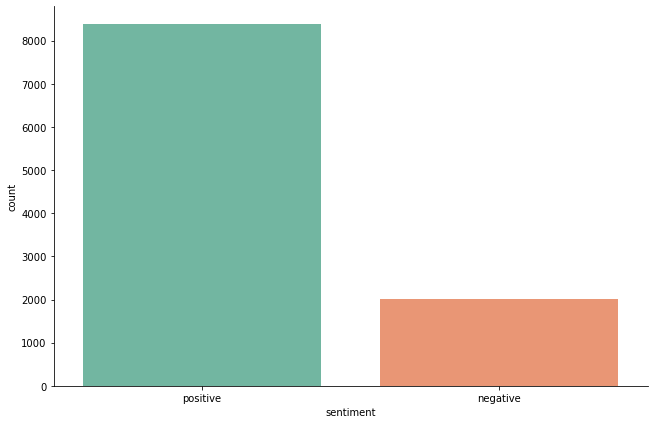

In [19]:
import seaborn as sns

sns.catplot(x='sentiment', data=tokens1, kind="count", height=6, aspect=1.5, palette="Set2")
plt.show()


In [20]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [21]:
from textblob import TextBlob

In [22]:
# Create a function to get the subjectivity
def getSubjectivity(text):
       return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
       return  TextBlob(text).sentiment.polarity

In [23]:
# Create two new columns 'Subjectivity' & 'Polarity'
a['Subjectivity'] = a['tweet'].apply(getSubjectivity)
a['Polarity'] = a['tweet'].apply(getPolarity)

In [24]:
def getAnalysis(score):
      if score < 0:
        return 'Negative'
      else:
        return 'Positive'
    
a['Analysis'] = a['Polarity'].apply(getAnalysis)

In [25]:
a.to_csv('a.csv')

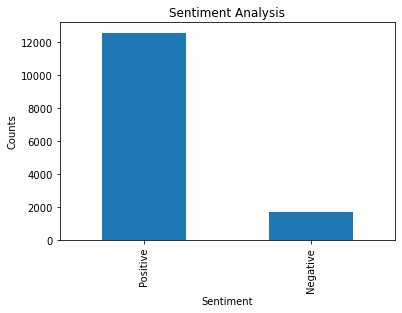

In [26]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
a['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

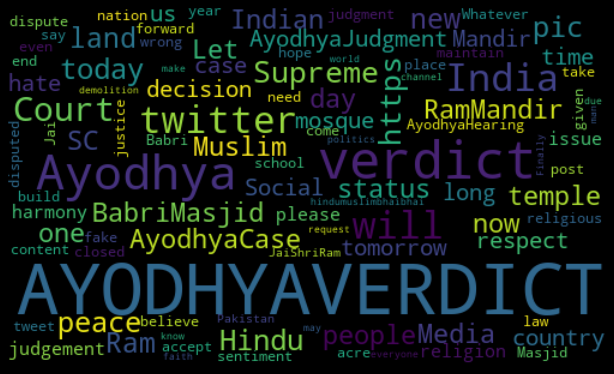

In [27]:
neg = a[a['Analysis'].values  == "Negative"]
allWords = ' '.join([twts for twts in neg['tweet']])
wordCloud = WordCloud(width=500, height=300, max_font_size=1500,stopwords=None,
                     normalize_plurals = True,regexp= None , max_words = 100,
                     collocations=False).generate(allWords)

## For increase graph size:
plt.figure(figsize=(10,5), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

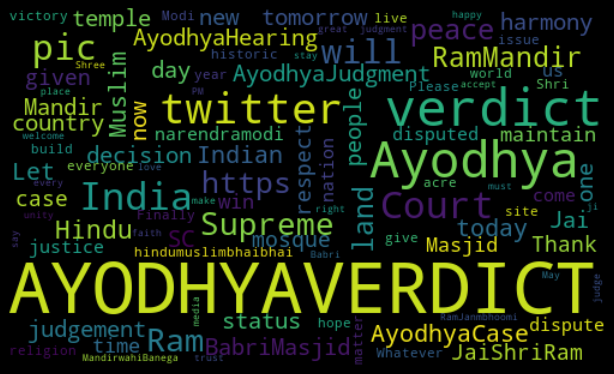

In [28]:
pos = a[a['Analysis'].values  == "Positive"]
allWords = ' '.join([twts for twts in pos['tweet']])
wordCloud = WordCloud(width=500, height=300, max_font_size=1500,stopwords=None,
                     normalize_plurals = True,regexp= None , max_words = 100,
                     collocations=False).generate(allWords)

## For increase graph size:
plt.figure(figsize=(10,5), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

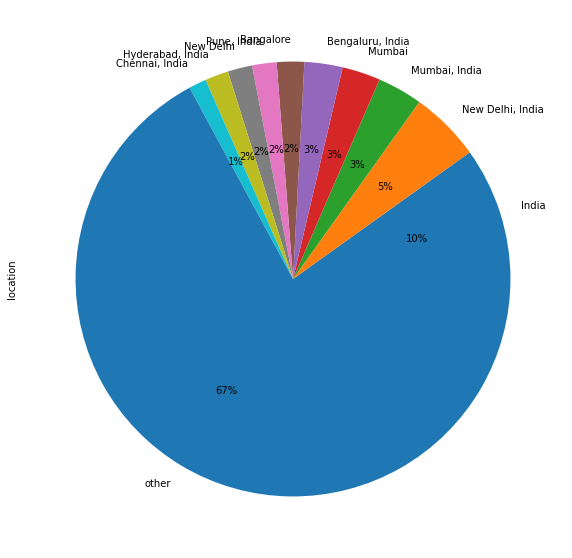

In [29]:
prob = neg['location'].value_counts(normalize=True)
threshold = 0.01
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
plt.figure(figsize=(16,10))
prob.plot(kind='pie', autopct='%1.0f%%')
plt.xticks(rotation=25)
plt.show()

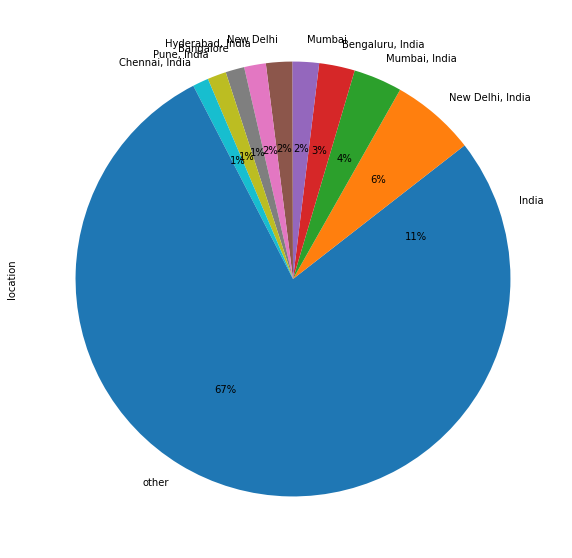

In [30]:
prob = pos['location'].value_counts(normalize=True)
threshold = 0.01
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
plt.figure(figsize=(16,10))
prob.plot(kind='pie', autopct='%1.0f%%')
plt.xticks(rotation=25)
plt.show()

In [31]:
l = ['accountant', 'actor', 'actress', 'activist', 'advocate', 'air steward', 'animator', 'architect', 'assistant', 'athlete',  'author', 'baker', 'biologist',\

'builder', 'career counselor', 'chef', 'civil servant', 'clerk', 'company director', 'consultant', 'computer programmer',\

'cook', 'decorator', 'dentist', 'designer', 'diplomat', 'director', 'doctor', 'economist', 'editor', 'environmentalist',\

'engineer', 'entrepreneur', 'executive', 'farmer', 'film director', 'flight attendant', 'geek', 'geologist', 'hairdresser', 'head teacher',\

'jeweler', 'journalist', 'judge', 'lawyer', 'lecturer', 'makeup artist', 'manager', 'musician', 'news', 'nurse', 'photographer', 'pilot',\

'police officer', 'politician', 'reporter', 'scientist', 'secretary', 'singer', 'soldier', 'software', 'student', 'surgeon', 'tailor',\

'teacher', 'tech savvy', 'travel agent', 'trainer', 'TV cameraman', 'TV presenter', 'vet', 'waiter', 'web designer', 'writer']  
pattern = '|'.join(l)

neg1 = neg.bio.str.contains(pattern, case=False)
pos1 = pos.bio.str.contains(pattern, case=False)

False    988
True     451
Name: bio, dtype: int64


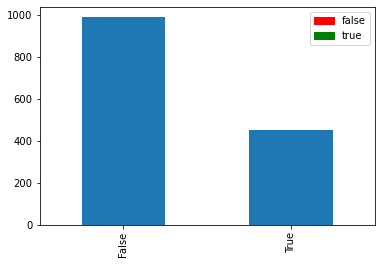

In [32]:
print(neg1.value_counts())
prob1 = neg1.value_counts(normalize=False).plot(kind='bar')
colors = {'false':'red', 'true':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

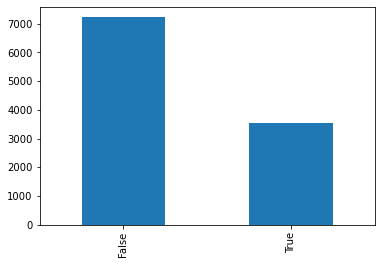

In [33]:
prob2 = pos1.value_counts(normalize=False).plot(kind='bar')

In [34]:
c = pd.concat([])

ValueError: No objects to concatenate

In [ ]:
neg2 = tokens1[tokens1['sentiment'].values  == "negative"]
allWords = ' '.join([twts for twts in neg2['stemmer']])
wordCloud = WordCloud(width=500, height=300, max_font_size=1500,stopwords=None,
                     normalize_plurals = True,regexp= None , max_words = 100,
                     collocations=False).generate(allWords)

## For increase graph size:
plt.figure(figsize=(10,5), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
pos2 = tokens1[tokens1['sentiment'].values  == "positive"]
allWords = ' '.join([twts for twts in pos2['stemmer']])
wordCloud = WordCloud(width=500, height=300, max_font_size=1500,stopwords=None,
                     normalize_plurals = True,regexp= None , max_words = 100,
                     collocations=False).generate(allWords)

## For increase graph size:
plt.figure(figsize=(10,5), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
l = ['accountant', 'actor', 'actress', 'activist', 'advocate', 'air steward', 'animator', 'architect', 'assistant', 'athlete',  'author', 'baker', 'biologist',\

'builder', 'career counselor', 'chef', 'civil servant', 'clerk', 'company director', 'consultant', 'computer programmer',\

'cook', 'decorator', 'dentist', 'designer', 'diplomat', 'director', 'doctor', 'economist', 'editor', 'environmentalist',\

'engineer', 'entrepreneur', 'executive', 'farmer', 'film director', 'flight attendant', 'geek', 'geologist', 'hairdresser', 'head teacher',\

'jeweler', 'journalist', 'judge', 'lawyer', 'lecturer', 'makeup artist', 'manager', 'musician', 'news', 'nurse', 'photographer', 'pilot',\

'police officer', 'politician', 'reporter', 'scientist', 'secretary', 'singer', 'soldier', 'software', 'student', 'surgeon', 'tailor',\

'teacher', 'tech savvy', 'travel agent', 'trainer', 'TV cameraman', 'TV presenter', 'vet', 'waiter', 'web designer', 'writer']  
pattern = '|'.join(l)

neg3 = neg2.bio.str.contains(pattern, case=False)
pos3 = pos2.bio.str.contains(pattern, case=False)

In [ ]:
print(neg3.value_counts())
my_colors = ['r', 'g']
prob3 = neg3.value_counts(normalize=False).plot(kind='bar', title='People with Occupation in Bios for Negative Tweets', color=my_colors)
plt.xlabel('Occupation mentioned', fontsize=16)
plt.ylabel('Num of Tweets', fontsize=16)

In [ ]:
print(pos3.value_counts())
prob4 = pos3.value_counts(normalize=False).plot.bar(title='People with Occupation in Bios for Positive Tweets', color=my_colors)
plt.xlabel('Occupation mentioned', fontsize=16)
plt.ylabel('Num of Tweets', fontsize=16)

In [ ]:
prob5 = neg2['location'].value_counts(normalize=True)
threshold = 0.01
mask = prob5 > threshold
tail_prob5 = prob5.loc[~mask].sum()
prob5 = prob5.loc[mask]
prob5['other'] = tail_prob5
plt.figure(figsize=(16,10))
prob.plot(kind='pie', autopct='%1.0f%%')
plt.xticks(rotation=25)
plt.show()

In [ ]:
a = a[a['bio'].notnull()]
allWords = ','.join(str(v) for v in a['bio'])
wordCloud = WordCloud(width=500, height=300, max_font_size=1500,stopwords=None,
                     normalize_plurals = True,regexp= None , max_words = 100,
                     collocations=False).generate(allWords)

## For increase graph size:
plt.figure(figsize=(10,5), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()